# Heart Disease Prediction

## Disclaimer

AI (ChatGPT) was user to help write this project, for both code and documentation. Any code generated has been studied, and any documentation has been verified.

## Dataset

"This dataset contains 1,888 records merged from five publicly available heart disease datasets. It includes 14 features that are crucial for predicting heart attack and stroke risks, covering both medical and demographic factors. Below is a detailed description of each feature." Source: Kaggle.

Dataset Source: https://www.kaggle.com/datasets/mfarhaannazirkhan/heart-dataset?resource=download&select=raw_merged_heart_dataset.csv  
The dataset is taken from Kaggle, but luckily there was a raw, uncleaned version of the dataset available. This is the dataset that is being used in this project. The dataset contains numerous columns, fourteen to be exact. They are as follows:

- **age**: Age of the patient (Numeric).
- **sex**: Gender of the patient. Values: 
  - 1 = male
  - 0 = female
- **cp**: Chest pain type. Values:
  - 0 = Typical angina
  - 1 = Atypical angina
  - 2 = Non-anginal pain
  - 3 = Asymptomatic
- **trestbps**: Resting Blood Pressure (in mm Hg) (Numeric).
- **chol**: Serum Cholesterol level (in mg/dl) (Numeric).
- **fbs**: Fasting blood sugar > 120 mg/dl. Values:
  - 1 = true
  - 0 = false
- **restecg**: Resting electrocardiographic results. Values:
  - 0 = Normal
  - 1 = ST-T wave abnormality
  - 2 = Left ventricular hypertrophy
- **thalach**: Maximum heart rate achieved (Numeric).
- **exang**: Exercise-induced angina. Values:
  - 1 = yes
  - 0 = no
- **oldpeak**: ST depression induced by exercise relative to rest (Numeric).
- **slope**: Slope of the peak exercise ST segment. Values:
  - 0 = Upsloping
  - 1 = Flat
  - 2 = Downsloping
- **ca**: Number of major vessels (0-3) colored by fluoroscopy. Values:
  - 0, 1, 2, 3
- **thal**: Thalassemia types. Values:
  - 1 = Normal
  - 2 = Fixed defect
  - 3 = Reversible defect
- **target**: Outcome variable (heart attack risk). Values:
  - 1 = more chance of heart attack
  - 0 = less chance of heart attack


Here are some definitions to help understand the dataset:

- **Angina**: Chest pain or discomfort due to reduced blood flow to the heart muscle.

- **Electrocardiographic**: Related to electrocardiography, a test that records the electrical activity of the heart.

- **Thalassemia**: A group of inherited blood disorders characterized by abnormal hemoglobin production, leading to anemia.

- **Fluoroscopy**: A medical imaging technique that provides real-time X-ray images, often used to observe the movement of internal organs or guide procedures.

- **ST Segment**: A portion of the electrocardiogram (ECG) tracing that represents the interval between ventricular depolarization and repolarization; abnormalities can indicate heart issues.

- **Ventricular Hypertrophy**: Thickening of the walls of the heart's ventricles, which can result from high blood pressure or other heart conditions.

- **Ischemia**: A condition characterized by reduced blood flow to a part of the body, often leading to oxygen deprivation in tissues.





In [1]:
import pandas as pd
import numpy as np

# Loading the dataset
df = pd.read_csv('../datasets/raw_merged_heart_dataset.csv')

# Various statistics of the dataset
description = df.describe()
shape = df.shape
columns = df.columns
null_values = df.isnull().sum()

# # Displaying the statistics
print(f'----- Description -----\n{description}\n')
print(f'----- Shape -----\n{shape}\n')
print(f'----- Columns -----\n{columns}\n')
print(f'----- Null Values -----\n{null_values}\n')


----- Description -----
               age          sex           cp      oldpeak       target
count  2181.000000  2181.000000  2181.000000  2181.000000  2181.000000
mean     53.477762     0.693260     1.507565     0.990509     0.496103
std       9.194787     0.461246     1.371587     1.141851     0.500099
min      28.000000     0.000000     0.000000     0.000000     0.000000
25%      46.000000     0.000000     0.000000     0.000000     0.000000
50%      54.000000     1.000000     2.000000     0.600000     0.000000
75%      60.000000     1.000000     2.000000     1.600000     1.000000
max      77.000000     1.000000     4.000000     6.200000     1.000000

----- Shape -----
(2181, 14)

----- Columns -----
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

----- Null Values -----
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
tha

## Data Cleaning
 
In order to make sure the model is accurate we have to work with clean data. This includes, but is not limited to:

1. Removing NaN, null or empty rows
2. Removing outliers using Z-score

In [2]:
rows_before = df.shape[0]
# Removing the rows with missing values
df = df.dropna()

# Handling '?' values
df = df.replace('?', np.nan).dropna()

rows_after = df.shape[0]
rows_dropped = rows_before - rows_after
print(f'Number of rows effected: {rows_dropped}')

Number of rows effected: 293


### Outlier Detection and Removal Using Z-Scores

**Purpose:** Detect and remove outliers from the dataset to improve data quality and model performance.

**Process:**
- Calculate Z-scores for numeric columns excluding the target.
- Remove rows where any Z-score exceeds |3|.
- Reset the DataFrame index.
- Print the number of rows removed.

**Why:** Outlier removal helps in reducing noise and improving the model's accuracy.

In [3]:
from scipy.stats import zscore

# Exclude the 'target' column from numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('target')

# Calculate Z-scores for each numeric column excluding 'target'
z_scores = df[numeric_cols].apply(zscore)

# Filter the dataframe to remove rows where any Z-score is beyond |3| (outside the std dev. of 99.7% of the data)
filtered_df = df[(z_scores.abs() <= 3).all(axis=1)]

# Reset index
filtered_df = filtered_df.reset_index(drop=True)

# Number of rows removed
removed_counts = df.shape[0] - filtered_df.shape[0]
print(f'Number of rows removed: {removed_counts}')

Number of rows removed: 13


### Model Training and Evaluation

**Purpose:** Train a Decision Tree Classifier and evaluate its performance on the dataset.

**Process:**
- Display the distribution of the target variable to check for imbalance.
- Split the dataset into features (`X`) and target (`y`).
- Split the data into training and testing sets.
- Initialize and train the Decision Tree Classifier.
- Make predictions on the test set.
- Evaluate the model using accuracy and a classification report.

**Why:** Ensures the model is trained and evaluated properly, providing insights into its performance.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Display the distribution of the target variable, making sure it is not imbalanced
print(filtered_df['target'].value_counts(normalize=True))

# Split the dataset into features and target variable
X = filtered_df.drop('target', axis=1)
y = filtered_df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9123091)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=798219)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')
print(f'Confusion Matrix:\n{confusion_matrix}')

target
1    0.52
0    0.48
Name: proportion, dtype: float64
Accuracy: 0.9413333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       171
           1       0.94      0.95      0.95       204

    accuracy                           0.94       375
   macro avg       0.94      0.94      0.94       375
weighted avg       0.94      0.94      0.94       375

Confusion Matrix:
[[159  12]
 [ 10 194]]


### Visualize the Decision Tree

**Purpose:** Visualize the trained Decision Tree Classifier to understand its structure and decision-making process.

**Process:**
- Define feature names and class names.
- Create a large figure with high DPI.
- Plot the decision tree with a maximum depth of 3.
- Adjust the layout and save the plot as a high-resolution image.
- Display the plot.

**Why:** Visualizing the tree helps in interpreting the model and understanding how it makes predictions.

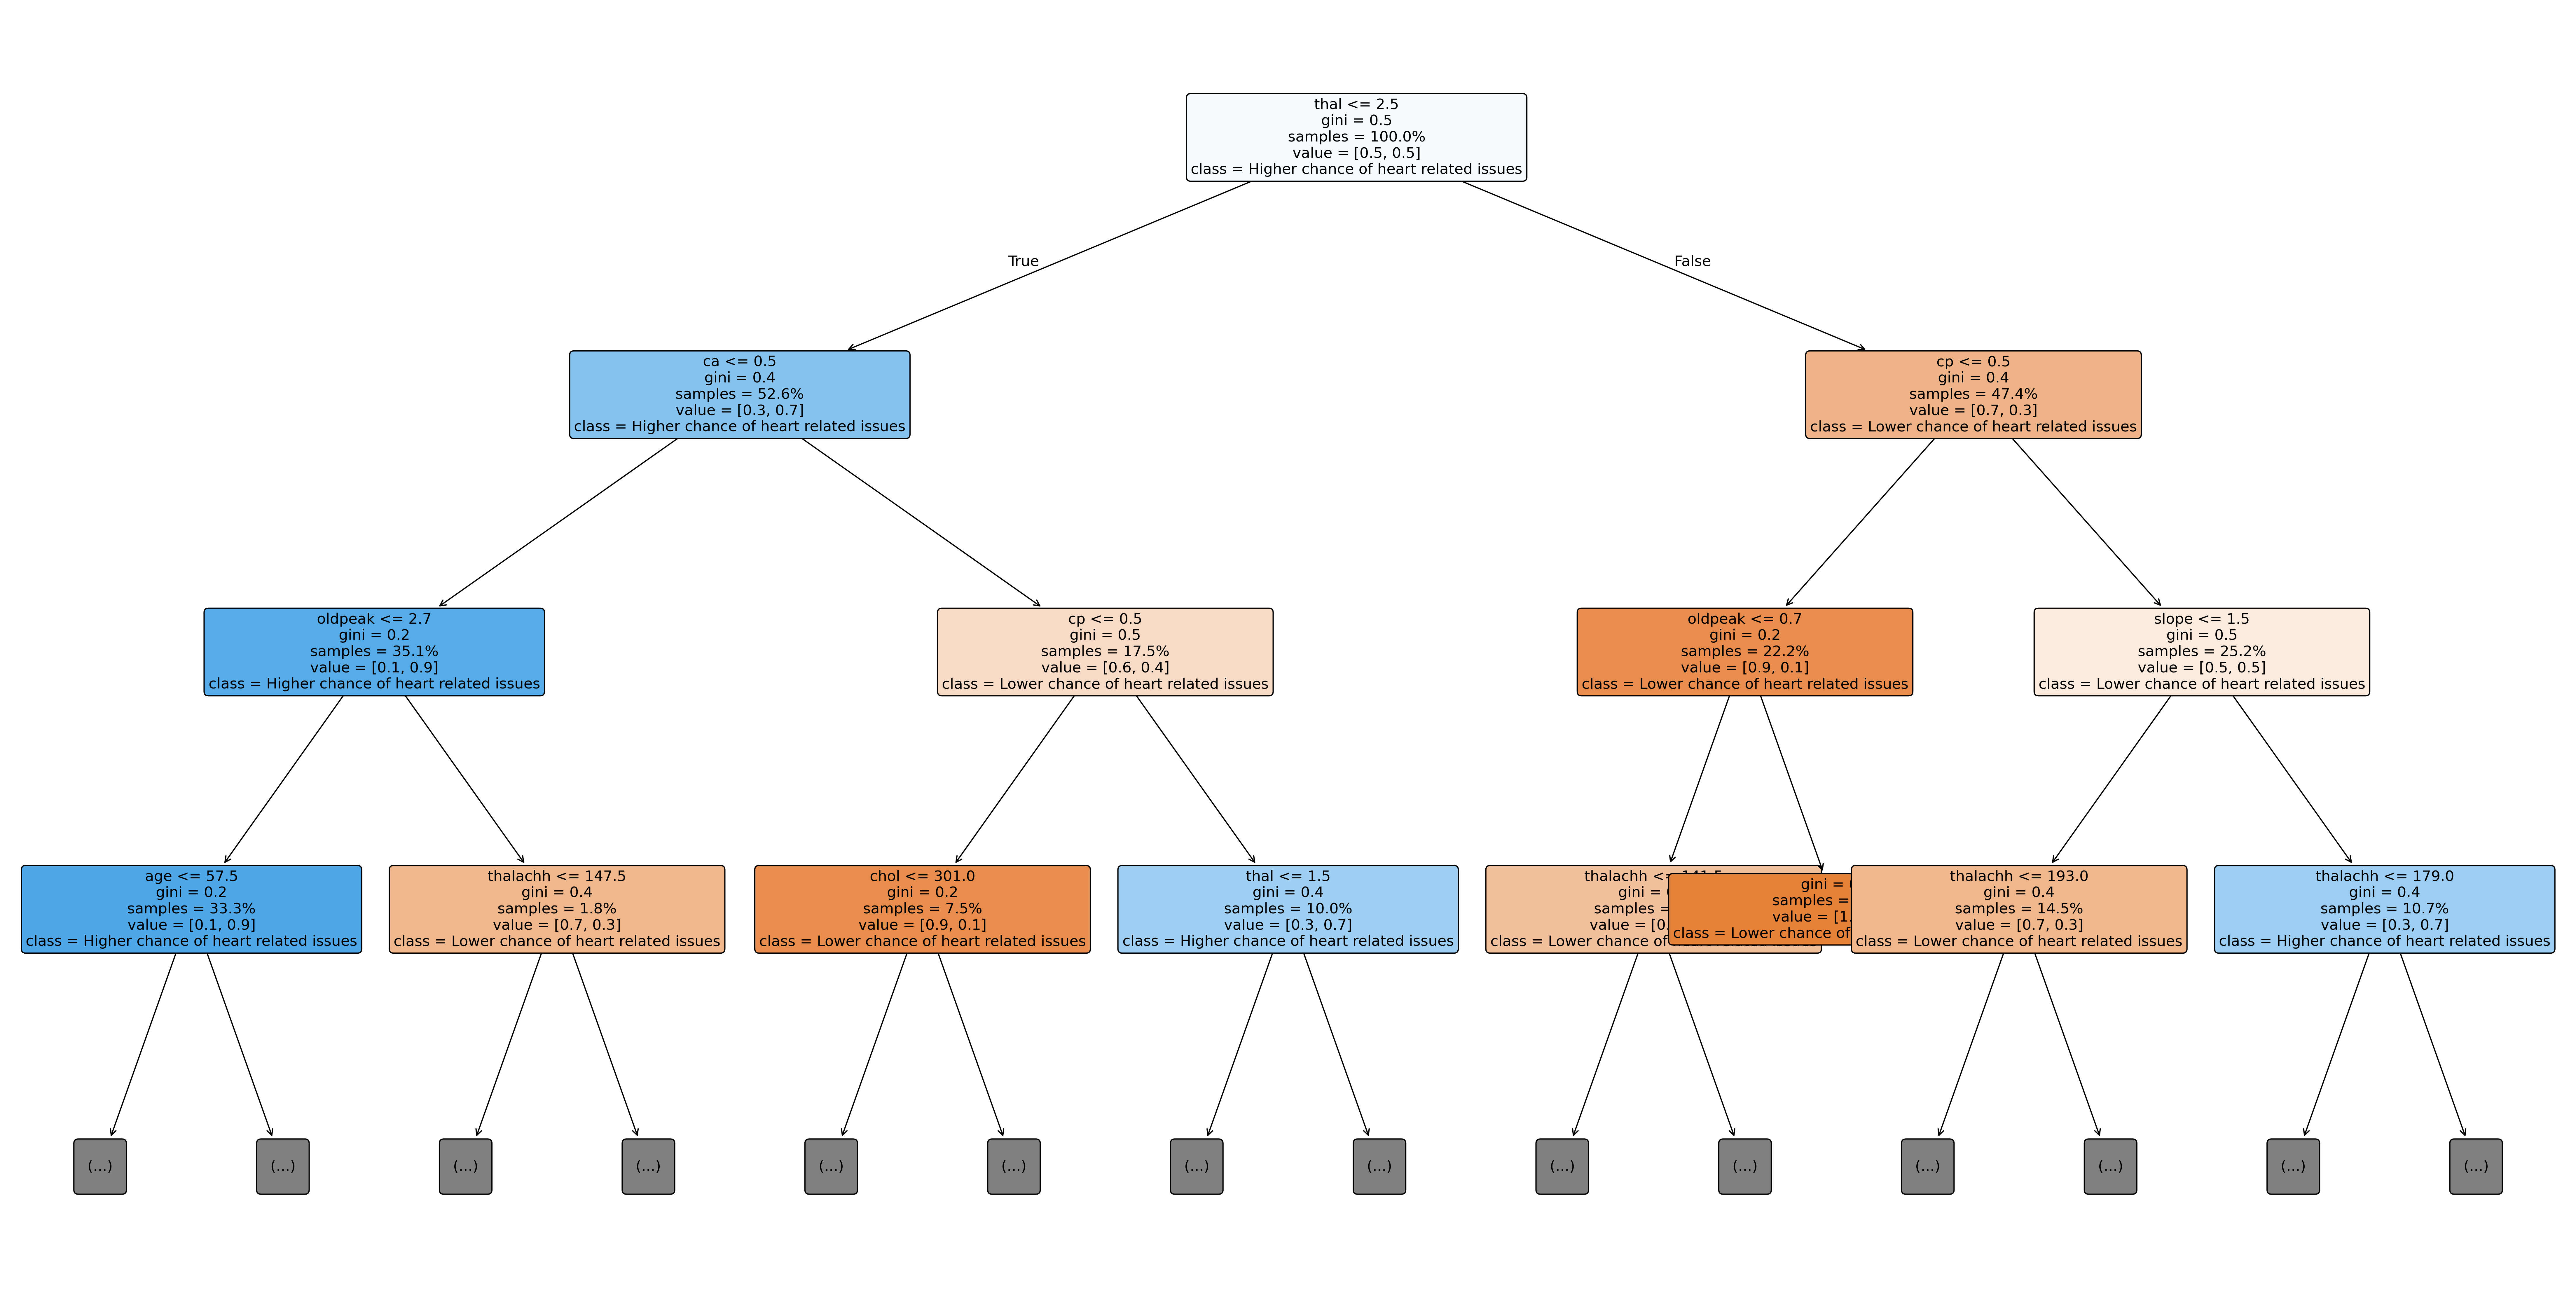

In [5]:
import matplotlib.pyplot as plt
from sklearn import tree

# Define feature names and class names
feature_names = X.columns
class_names = ['Lower chance of heart related issues', 'Higher chance of heart related issues']

# Create large figure with high DPI
plt.figure(figsize=(30,15), dpi=300)

# Plot tree with depth limit
tree.plot_tree(clf, 
               max_depth=3,       # Limit tree depth to 4 layers
               feature_names=feature_names,
               class_names=class_names,
               filled=True,
               fontsize=12,       # Increased font size
               proportion=True,    
               rounded=True,
               precision=1)

# Adjust layout
plt.tight_layout()

# Save high resolution image
plt.savefig('decision_tree.png', 
            dpi=300,
            bbox_inches='tight',
            pad_inches=1.5)

plt.show()

### Test Input Prediction

Now I will create a test input for the model to test its validity. I will pass this into the model and review the results.

In [8]:
# Test input for prediction

test_input = pd.DataFrame({
    "age": [25],
    "sex": [1], 
    "cp": [0], 
    "trestbps": [120],
    "chol": [180],
    "fbs": [0],
    "restecg": [0],
    "thalachh": [190],
    "exang": [0],
    "oldpeak": [0.0],
    "slope": [0],
    "ca": [0],
    "thal": [1],
})


# Make prediction
prediction = clf.predict(test_input)
prediction = class_names[prediction[0]]
print(prediction)

Higher chance of heart related issues
